<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [1]:

!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2023-04-07 02:34:18--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.45.118.108
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.45.118.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: 'm4_survey_data.sqlite.2'

m4_survey_data.sqli 100%[===================>]  34.98M   423KB/s    in 50s     

2023-04-07 02:35:09 (721 KB/s) - 'm4_survey_data.sqlite.2' saved [36679680/36679680]



Connect to the database.


In [20]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection

Import pandas module.


In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Demo: How to run an sql query


In [22]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [23]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [24]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [26]:
table_name = 'master'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "master" (
"index" INTEGER,
  "Respondent" INTEGER,
  "MainBranch" TEXT,
  "Hobbyist" TEXT,
  "OpenSourcer" TEXT,
  "OpenSource" TEXT,
  "Employment" TEXT,
  "Country" TEXT,
  "Student" TEXT,
  "EdLevel" TEXT,
  "UndergradMajor" TEXT,
  "OrgSize" TEXT,
  "YearsCode" TEXT,
  "Age1stCode" TEXT,
  "YearsCodePro" TEXT,
  "CareerSat" TEXT,
  "JobSat" TEXT,
  "MgrIdiot" TEXT,
  "MgrMoney" TEXT,
  "MgrWant" TEXT,
  "JobSeek" TEXT,
  "LastHireDate" TEXT,
  "FizzBuzz" TEXT,
  "ResumeUpdate" TEXT,
  "CurrencySymbol" TEXT,
  "CurrencyDesc" TEXT,
  "CompTotal" REAL,
  "CompFreq" TEXT,
  "ConvertedComp" REAL,
  "WorkWeekHrs" REAL,
  "WorkRemote" TEXT,
  "WorkLoc" TEXT,
  "ImpSyn" TEXT,
  "CodeRev" TEXT,
  "CodeRevHrs" REAL,
  "UnitTests" TEXT,
  "PurchaseHow" TEXT,
  "PurchaseWhat" TEXT,
  "OpSys" TEXT,
  "BlockchainOrg" TEXT,
  "BlockchainIs" TEXT,
  "BetterLife" TEXT,
  "ITperson" TEXT,
  "OffOn" TEXT,
  "SocialMedia" TEXT,
  "Extraversion" TEXT,
  "ScreenName" TEXT,
  "SOVisit1st" T

In [27]:
# your code goes here
QUERY1 = """
SELECT ConvertedComp,Age,WorkWeekHrs,CodeRevHrs,Respondent FROM master
"""
df_master = pd.read_sql_query(QUERY1,conn)

# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Frequency'>

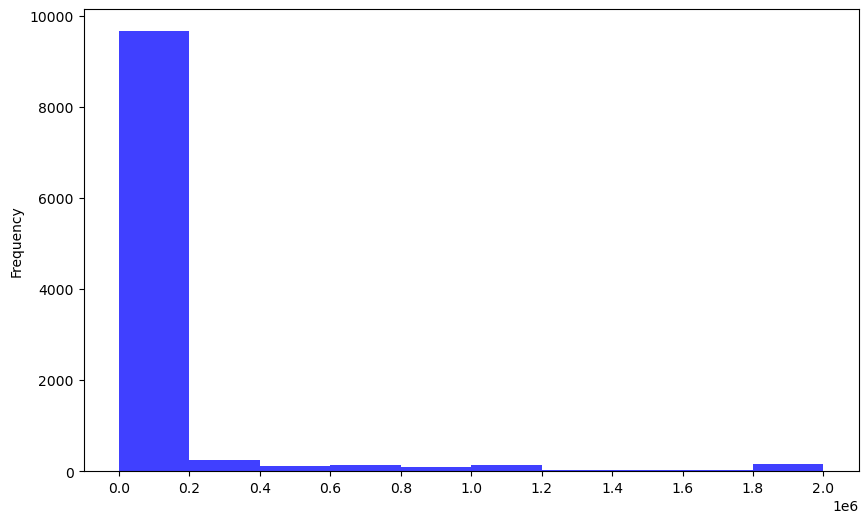

In [28]:

# your code goes here

df_covertedcomp=df_master['ConvertedComp']
df_covertedcomp.dropna(inplace = True)
count, bin_edges = np.histogram(df_covertedcomp, 10)
df_covertedcomp.plot(kind ='hist',
            figsize=(10, 6),
            bins=10,
            alpha=0.75,
            xticks=bin_edges,
            color=['blue']
            )

### Box Plots


Plot a box plot of `Age.`


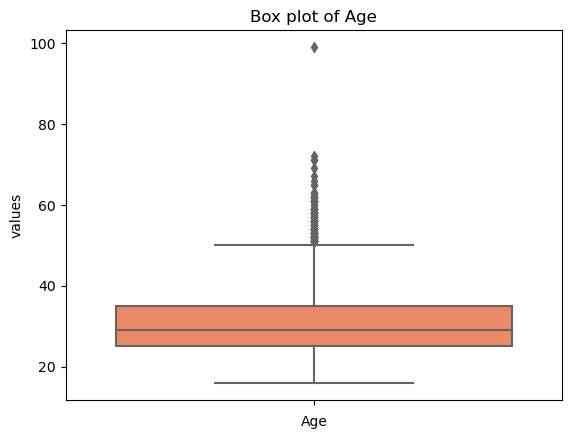

In [29]:
# your code goes here
sns.boxplot(y='Age', data=df_master,color='coral')

plt.title('Box plot of Age')
plt.ylabel('values')
plt.xlabel('Age')
plt.show()


## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


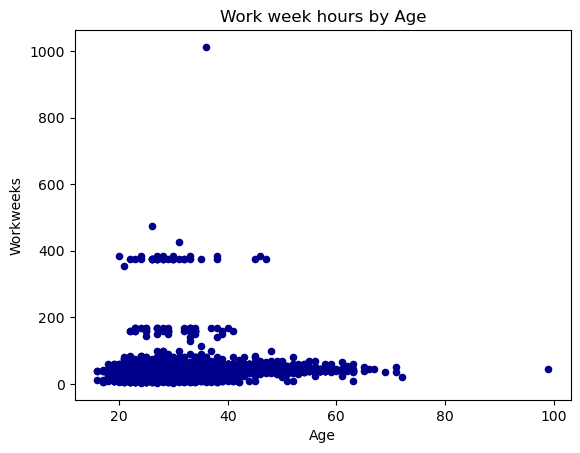

In [30]:
df_age_workweekhrs=df_master[['Age','WorkWeekHrs']]
# generate scatter plot
df_age_workweekhrs.plot(kind='scatter', x='Age', y='WorkWeekHrs',color='darkblue')

# add title and label to axes
plt.title('Work week hours by Age')
plt.xlabel('Age')
plt.ylabel('Workweeks')

# show plot
plt.show()




### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


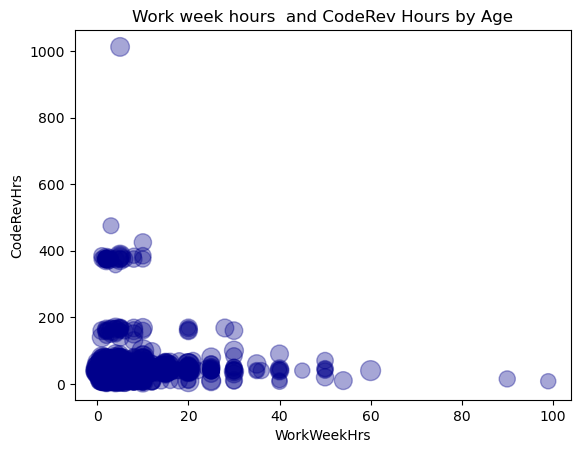

In [31]:
df_age=df_master[['Age','WorkWeekHrs','CodeRevHrs']]
# generate scatter plot
df_age.plot(kind='scatter', y='WorkWeekHrs', x='CodeRevHrs',s=df_age['Age']*5,color='darkblue',alpha=0.35)

# add title and label to axes
plt.title('Work week hours  and CodeRev Hours by Age')
plt.xlabel('WorkWeekHrs')
plt.ylabel('CodeRevHrs')

# show plot
plt.show()

In [36]:
#In the list of most popular languages respondents wish to learn next year, what is the rank of Python?#
QUERY = """
SELECT LanguageDesireNextYear,count(*) as number,RANK() OVER (ORDER BY COUNT(*) DESC) AS rank FROM LanguageDesireNextYear
group by LanguageDesireNextYear
order by rank
"""

df_database = pd.read_sql_query(QUERY,conn)
df_database[df_database['LanguageDesireNextYear']=='Python']

,LanguageDesireNextYear,number,rank
2,Python,5239,3


In [55]:
#How many respondents indicated that they currently work with 'SQL'? 
#In the list of most popular languages respondents wish to learn next year, what is the rank of Python?#
QUERY = """
SELECT LanguageWorkedWith,count(*) FROM LanguageWorkedWith
WHERE UPPER(LanguageWorkedWith)='SQL'
"""
df_database = pd.read_sql_query(QUERY,conn)
df_database

,LanguageWorkedWith,count(*)
0,SQL,7106


In [82]:
#How many respondents indicated that they work on 'MySQL' only? 
QUERY = """
SELECT * FROM DatabaseWorkedWith
"""

df_data = pd.read_sql_query(QUERY,conn)
df_data.drop_duplicates(subset=['Respondent'], keep=False,inplace=True)
df_data[df_data['DatabaseWorkedWith']=='MySQL'].shape

(474, 2)

In [48]:
QUERY = """
SELECT DevType,count(*) AS Count FROM DevType
Group by DevType 
order by Count desc
"""
df_data = pd.read_sql_query(QUERY,conn)
df_data

,DevType,Count
0,"Developer, full-stack",6928
1,"Developer, back-end",6290
2,"Developer, front-end",3920
3,"Developer, desktop or enterprise applications",2575
4,"Developer, mobile",1959
5,DevOps specialist,1639
6,Database administrator,1413
7,System administrator,1202
8,Designer,988
9,"Developer, QA or test",911


## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


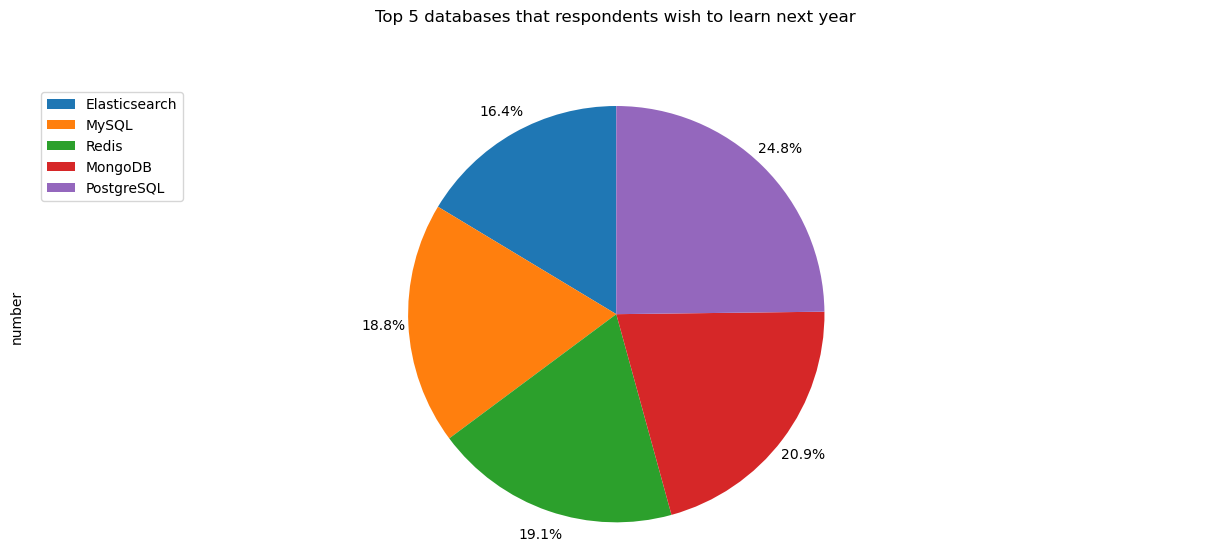

In [14]:
# your code goes here


QUERY = """
SELECT DatabaseDesireNextYear,count(*) as number FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by number
"""

df_database = pd.read_sql_query(QUERY,conn).tail()

df_database['number'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            )
# scale the title up by 12% to match pctdistance
plt.title('Top 5 databases that respondents wish to learn next year', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_database['DatabaseDesireNextYear'], loc='upper left') 

plt.show()

### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


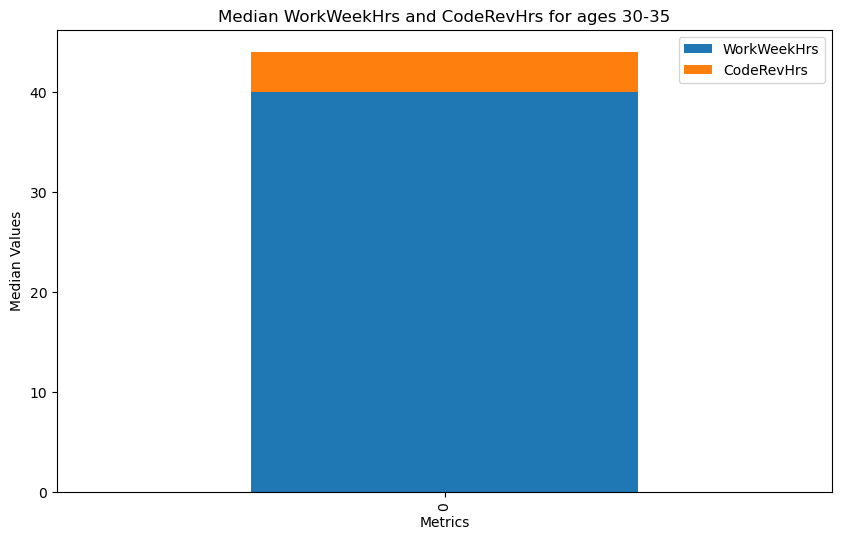

In [15]:
# Define the SQL query
query = """
SELECT WorkWeekHrs, CodeRevHrs
FROM master
WHERE Age BETWEEN 30 AND 35
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Compute the median values for each column
df_medians = df.median().to_frame().transpose()

# Create a stacked bar chart
df_medians.plot(kind='bar',figsize=(10, 6), stacked=True)

# Set the chart title and axis labels
plt.title('Median WorkWeekHrs and CodeRevHrs for ages 30-35')
plt.xlabel('Metrics')
plt.ylabel('Median Values')
plt.legend(loc='upper right') 
# Show the chart
plt.show()



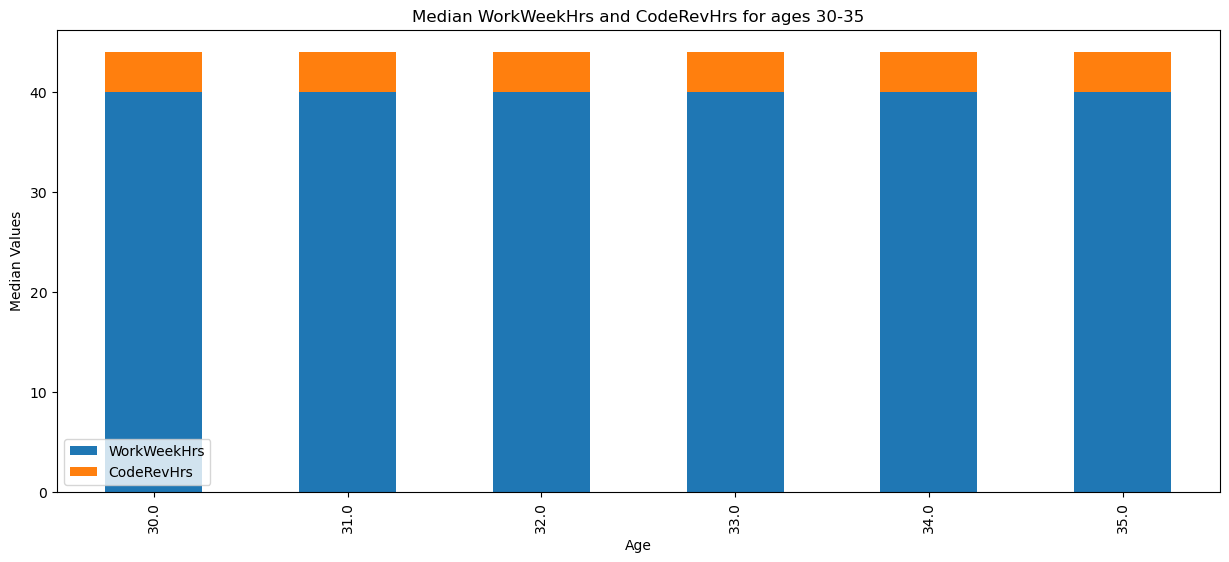

In [16]:

# Median of WorkWeekHrs, CodeRevHrs group by age
query = """
SELECT WorkWeekHrs, CodeRevHrs,Age
FROM master
WHERE Age BETWEEN 30 AND 35
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Compute the median values for each column
df_medians = df.groupby('Age').median()
# Create a stacked bar chart
df_medians.plot(kind='bar',figsize=(15, 6), stacked=True)

# Set the chart title and axis labels
plt.title('Median WorkWeekHrs and CodeRevHrs for ages 30-35')
plt.xlabel('Age')
plt.ylabel('Median Values')
plt.legend(loc='lower left') 
# Show the chart
plt.show()

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


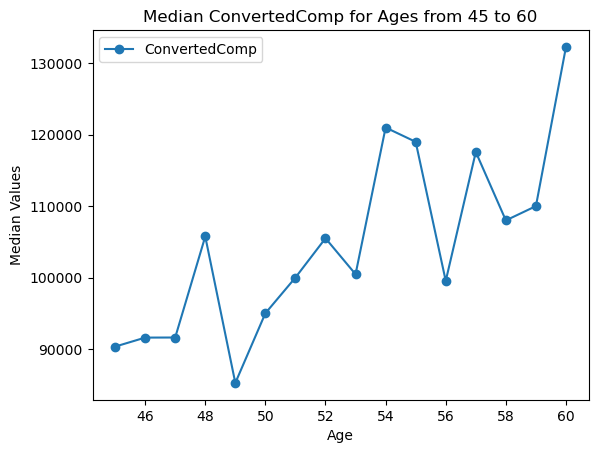

In [50]:
# your code goes here

query = """
SELECT ConvertedComp,Age
FROM master
WHERE Age BETWEEN 45 AND 60
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)

# Compute the median values for each column
df['Age'] = df['Age'].astype(int)
df_ConvertedComp = df.groupby('Age').median()

# Create a stacked bar chart
df_ConvertedComp.plot(kind='line',marker='o')

# Set the chart title and axis labels
plt.title('Median ConvertedComp for Ages from 45 to 60')
plt.xlabel('Age')
plt.ylabel('Median Values')
plt.legend(loc='upper left') 
# Show the chart
plt.show()

### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


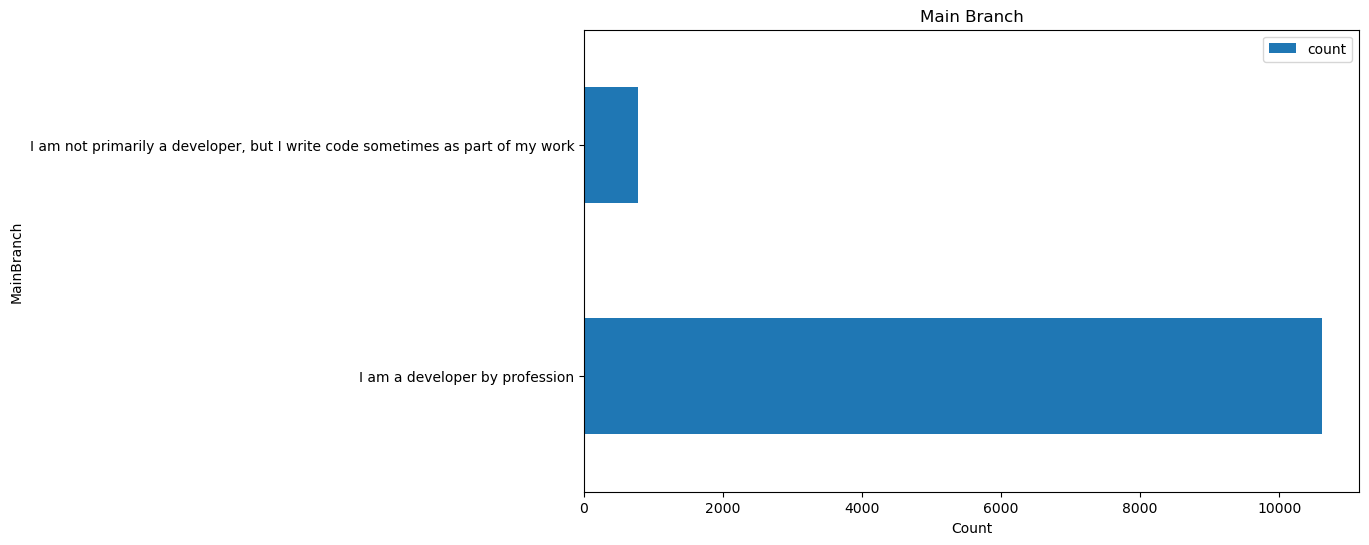

In [18]:
query = """
SELECT MainBranch,count(*) as count FROM master group by MainBranch
"""

# Read the data into a pandas DataFrame
df = pd.read_sql_query(query, conn)
df.set_index('MainBranch', inplace=True)
df.plot(kind='barh', figsize=(10, 6))

plt.xlabel('Count') # add to x-label to the plot
plt.title('Main Branch') # add title to the plot

plt.show()


Close the database connection.


In [19]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
